In [2]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import yfinance as yf

In [3]:
st = datetime(2015, 1, 1)
ed = datetime(2020, 6, 10)

In [4]:
dis = yf.download(tickers='DIS', start=st, end=ed)

[*********************100%%**********************]  1 of 1 completed


In [5]:
returns = 100 * dis.Close.pct_change().dropna()

Text(0.5, 1.0, 'DIS Returns')

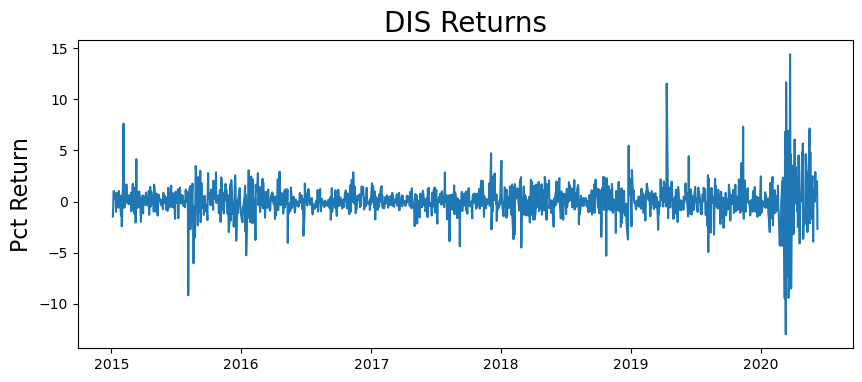

In [6]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('DIS Returns', fontsize=20)

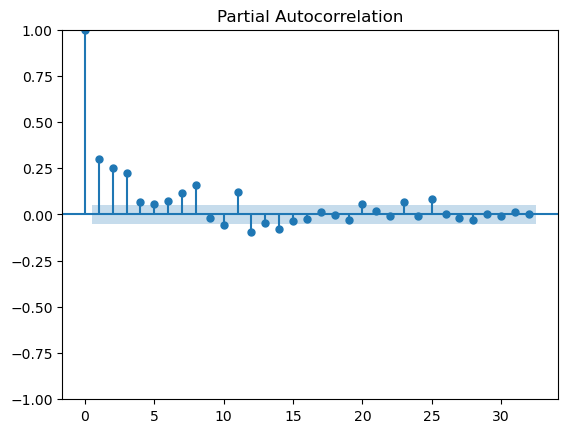

In [7]:
plot_pacf(returns**2)
plt.show()

In [8]:
model = arch_model(returns, p=3, q=3)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 226817739842.71448
Iteration:      2,   Func. Count:     22,   Neg. LLF: 975679599.6168538
Iteration:      3,   Func. Count:     33,   Neg. LLF: 2730.6366984020387
Iteration:      4,   Func. Count:     43,   Neg. LLF: 2484.4387626627313
Iteration:      5,   Func. Count:     53,   Neg. LLF: 2321.3748609805943
Iteration:      6,   Func. Count:     63,   Neg. LLF: 2323.955208643305
Iteration:      7,   Func. Count:     73,   Neg. LLF: 2392.948594175753
Iteration:      8,   Func. Count:     83,   Neg. LLF: 2382.038561838449
Iteration:      9,   Func. Count:     93,   Neg. LLF: 2297.2998662705595
Iteration:     10,   Func. Count:    102,   Neg. LLF: 2297.3150548935437
Iteration:     11,   Func. Count:    112,   Neg. LLF: 2297.1717760971264
Iteration:     12,   Func. Count:    121,   Neg. LLF: 2297.158627494537
Iteration:     13,   Func. Count:    130,   Neg. LLF: 2297.14363530216
Iteration:     14,   Func. Count:    139,   Neg. LLF: 2297

/opt/mamba/lib/python3.10/site-packages/arch/univariate/base.py:1890: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isinstance(table_val[pos], (np.float64, float)):
/opt/mamba/lib/python3.10/site-packages/arch/univariate/base.py:1891: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  assert isinstance(table_val[pos], float)
/opt/mamba/lib/python3.10/site-packages/arch/univariate/base.py:1892: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2297.14
Distribution:                  Normal   AIC:                           4610.28
Method:            Maximum Likelihood   BIC:                           4652.04
                                        No. Observations:                 1367
Date:                Thu, Dec 28 2023   Df Residuals:                     1366
Time:                        14:24:29   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -6.7113e-03  4.330e-02     -0.155      0.877 [-9.157e-02,7.815e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.5412      0.190      2.855  4.305e-03    [  0.170,  0.913]
alpha[1]       0.0686  3.956e-02      1.733  8.314e-02 [-8.990e-03,  0.146]
alpha[2]       0.2036  9.906e-02      2.055  3.987e-02  [9.428e-03,  0.398]
alpha[3]       0.3175      0.152      2.094  3.625e-02  [2.033e-02,  0.615]
beta[1]        0.0000      0.164      0.000      1.000    [ -0.322,  0.322]
beta[2]    2.2923e-14  9.647e-02  2.376e-13      1.000    [ -0.189,  0.189]
beta[3]        0.2299      0.169      1.359      0.174    [ -0.102,  0.562]
===========================================================================

Covariance estimator: robust
"""

In [9]:
model = arch_model(returns, p=3, q=0)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 3342.623963807572
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2433500.4211862637
Iteration:      3,   Func. Count:     23,   Neg. LLF: 3847.2261937111602
Iteration:      4,   Func. Count:     30,   Neg. LLF: 130355.71360968299
Iteration:      5,   Func. Count:     37,   Neg. LLF: 2474.7430936435358
Iteration:      6,   Func. Count:     44,   Neg. LLF: 13518.546903639099
Iteration:      7,   Func. Count:     51,   Neg. LLF: 21886.02670439152
Iteration:      8,   Func. Count:     58,   Neg. LLF: 2454.5157759988647
Iteration:      9,   Func. Count:     65,   Neg. LLF: 2321.6558195392026
Iteration:     10,   Func. Count:     72,   Neg. LLF: 2312.485477782621
Iteration:     11,   Func. Count:     78,   Neg. LLF: 2312.3200770683393
Iteration:     12,   Func. Count:     84,   Neg. LLF: 2312.300436449439
Iteration:     13,   Func. Count:     90,   Neg. LLF: 2312.2987737742415
Iteration:     14,   Func. Count:     96,   Neg. LLF: 2

/opt/mamba/lib/python3.10/site-packages/arch/univariate/base.py:1890: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isinstance(table_val[pos], (np.float64, float)):
/opt/mamba/lib/python3.10/site-packages/arch/univariate/base.py:1891: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  assert isinstance(table_val[pos], float)
/opt/mamba/lib/python3.10/site-packages/arch/univariate/base.py:1892: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2312.30
Distribution:                  Normal   AIC:                           4634.60
Method:            Maximum Likelihood   BIC:                           4660.70
                                        No. Observations:                 1367
Date:                Thu, Dec 28 2023   Df Residuals:                     1366
Time:                        14:24:30   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0102  3.994e-02      0.255      0.799 [-6.811e-02,8.846e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.8619      0.138      6.227  4.741e-10    [  0.591,  1.133]
alpha[1]       0.0888  4.543e-02      1.955  5.054e-02 [-2.071e-04,  0.178]
alpha[2]       0.2625  9.141e-02      2.871  4.089e-03  [8.329e-02,  0.442]
alpha[3]       0.3557      0.169      2.099  3.578e-02  [2.363e-02,  0.688]
===========================================================================

Covariance estimator: robust
"""

In [10]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [13]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

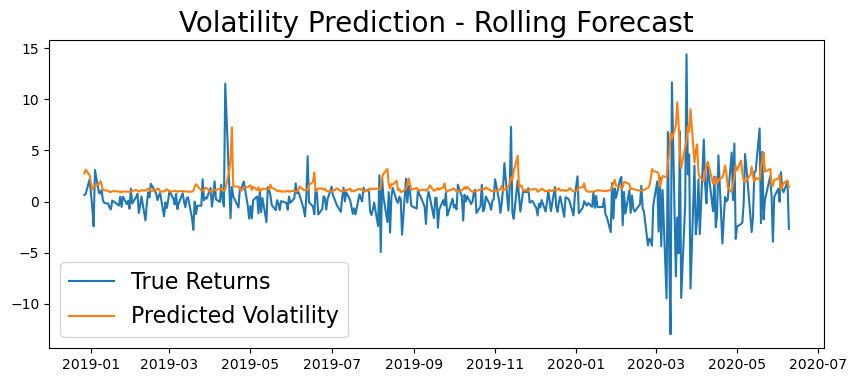

In [39]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

In [40]:
st = datetime(2000, 1, 1)
ed = datetime(2020, 6, 10)

In [41]:
spy = yf.download(tickers='SPY', start=st, end=ed)

[*********************100%%**********************]  1 of 1 completed


In [42]:
returns = 100 * spy.Close.pct_change().dropna()

Text(0.5, 1.0, 'SPY Returns')

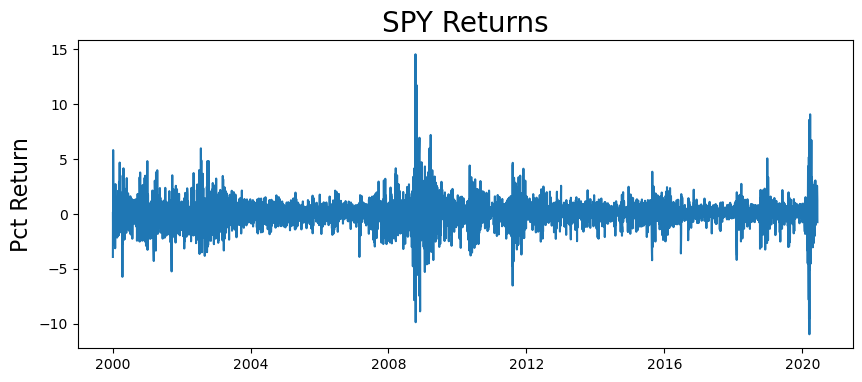

In [43]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('SPY Returns', fontsize=20)

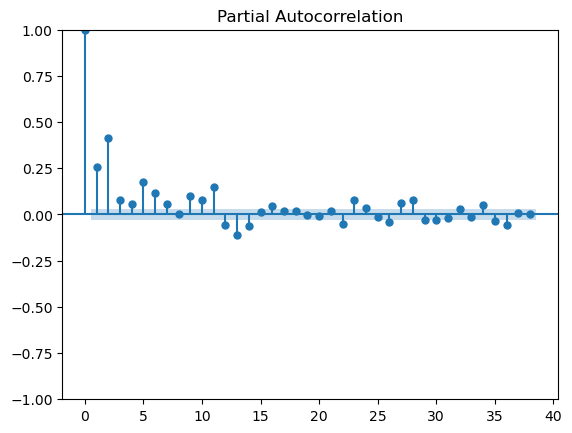

In [44]:
plot_pacf(returns**2)
plt.show()

In [45]:
model = arch_model(returns, p=2, q=2)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 95281.22632853912
Iteration:      2,   Func. Count:     20,   Neg. LLF: 56723.35373923968
Iteration:      3,   Func. Count:     31,   Neg. LLF: 11217.815263977092
Iteration:      4,   Func. Count:     40,   Neg. LLF: 13359.984159695585
Iteration:      5,   Func. Count:     49,   Neg. LLF: 2150455528.452342
Iteration:      6,   Func. Count:     57,   Neg. LLF: 7229.685915373393
Iteration:      7,   Func. Count:     65,   Neg. LLF: 7085.302857104669
Iteration:      8,   Func. Count:     73,   Neg. LLF: 7055.817132871379
Iteration:      9,   Func. Count:     82,   Neg. LLF: 7052.973817235061
Iteration:     10,   Func. Count:     90,   Neg. LLF: 7052.31303474665
Iteration:     11,   Func. Count:     97,   Neg. LLF: 7052.31255967196
Iteration:     12,   Func. Count:    104,   Neg. LLF: 7052.312558759257
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7052.312558759257
            Iterations: 12
 

/opt/mamba/lib/python3.10/site-packages/arch/univariate/base.py:1890: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isinstance(table_val[pos], (np.float64, float)):
/opt/mamba/lib/python3.10/site-packages/arch/univariate/base.py:1891: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  assert isinstance(table_val[pos], float)
/opt/mamba/lib/python3.10/site-packages/arch/univariate/base.py:1892: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7052.31
Distribution:                  Normal   AIC:                           14116.6
Method:            Maximum Likelihood   BIC:                           14155.9
                                        No. Observations:                 5140
Date:                Tue, Dec 12 2023   Df Residuals:                     5139
Time:                        10:38:28   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0664  1.096e-02      6.055  1.407e-09 [4.487e-02,8.783e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0406  9.950e-03      4.077  4.566e-05 [2.106e-02,6.007e-02]
alpha[1]       0.0809  2.203e-02      3.671  2.419e-04   [3.769e-02,  0.124]
alpha[2]       0.1328  3.069e-02      4.327  1.511e-05   [7.264e-02,  0.193]
beta[1]        0.3011      0.296      1.017      0.309     [ -0.279,  0.882]
beta[2]        0.4561      0.261      1.749  8.034e-02  [-5.510e-02,  0.967]
============================================================================

Covariance estimator: robust
"""

In [46]:
rolling_predictions = []
test_size = 365*5

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [47]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*5:])

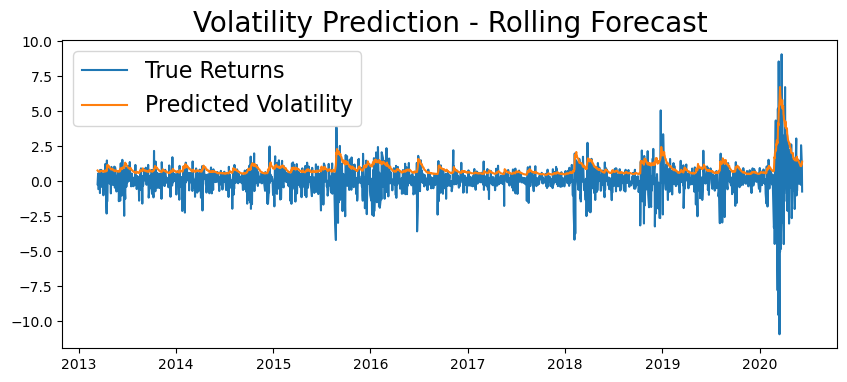

In [48]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*5:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

In [49]:
train = returns
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

In [50]:
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

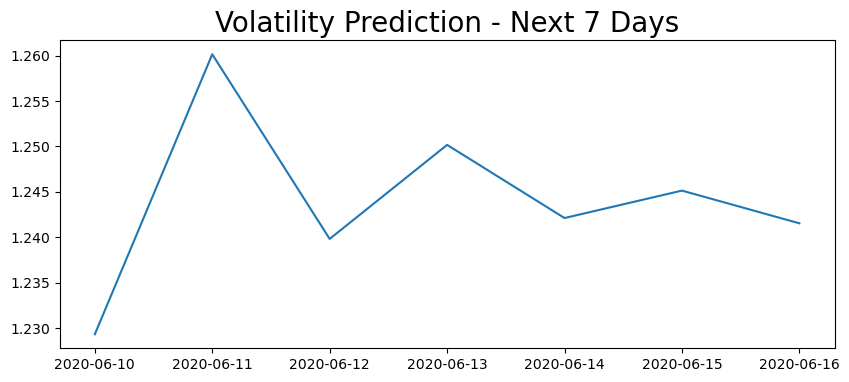

In [51]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)